# Part 1 Supervised Learning

# Importing Libraries..

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [61]:
df = pd.read_csv('bank.csv',sep=';')

## Check Dataset

In [92]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [62]:
df.shape

(41188, 21)

In [93]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
marital,41188.0,1.172769,0.608902,0.000,1.000,1.000,2.000,3.000
default,41188.0,0.208872,0.406686,0.000,0.000,0.000,0.000,2.000
housing,41188.0,1.071720,0.985314,0.000,0.000,2.000,2.000,2.000
loan,41188.0,0.327425,0.723616,0.000,0.000,0.000,0.000,2.000
contact,41188.0,0.365252,0.481507,0.000,0.000,0.000,1.000,1.000
month,41188.0,4.230868,2.320025,0.000,3.000,4.000,6.000,9.000
day_of_week,41188.0,2.004613,1.397575,0.000,1.000,2.000,3.000,4.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000


In [64]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# EDA

In [66]:
def doit(x):
    print('Column Name :',x)
    print('-'*40)
    print('dtype')
    print(df[x].dtypes)
    print('-'*40)
    print('isnull sum')
    print(df[x].isnull().sum())
    print('-'*40)
    print('isnull mean')
    print(df[x].isnull().mean())
    print('-'*40)
    print("N_Unique")
    print(df[x].nunique())
    print('-'*40)
    print('unique')
    print(df[x].unique())
    print('-'*40)
    print('value_counts')
    print(df[x].value_counts())
    print('-'*40)
    print('describe')
    print(df[x].describe())
    print('-'*40)
    print('Mode')
    print(df[x].mode().max())
    print('-'*40)
    print('Mean')
    print(df[x].mean())
    print('-'*40)

# Q1

In [67]:
for i in df.select_dtypes(include=[np.float64,np.int64]).columns:
#for i in df.select_dtypes(include=[np.float64,np.int64]).columns:
    doit(i)

Column Name : age
----------------------------------------
dtype
int64
----------------------------------------
isnull sum
0
----------------------------------------
isnull mean
0.0
----------------------------------------
N_Unique
78
----------------------------------------
unique
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
----------------------------------------
value_counts
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
----------------------------------------
describe
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
-----------------------

Name: nr.employed, dtype: int64
----------------------------------------
describe
count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
----------------------------------------
Mode
5228.1
----------------------------------------
Mean
5167.035910941844
----------------------------------------


## Q2

In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

age


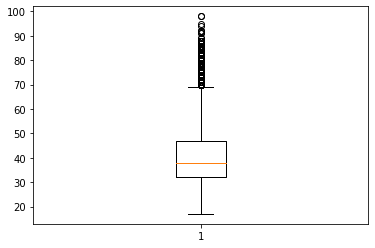

duration


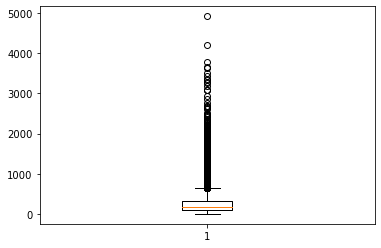

campaign


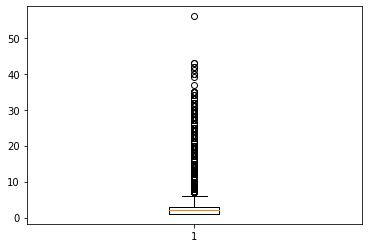

pdays


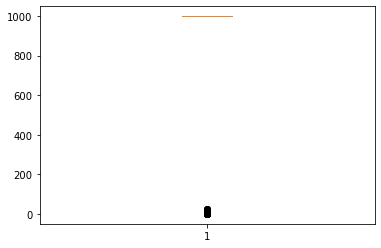

previous


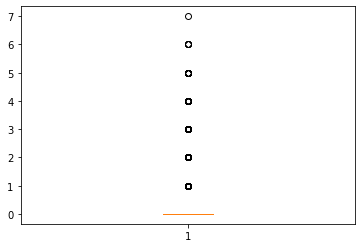

emp.var.rate


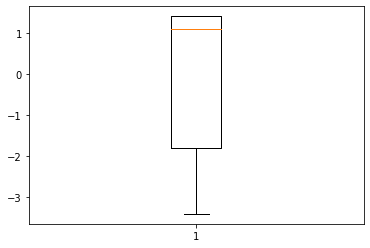

cons.price.idx


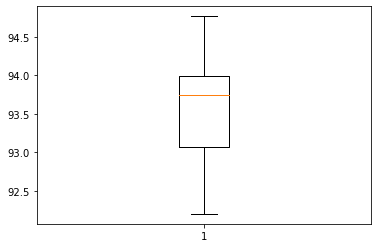

cons.conf.idx


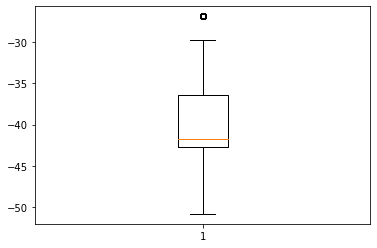

euribor3m


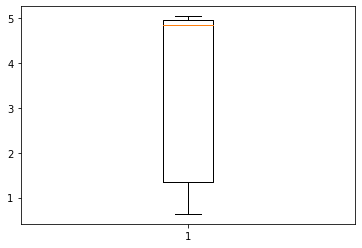

nr.employed


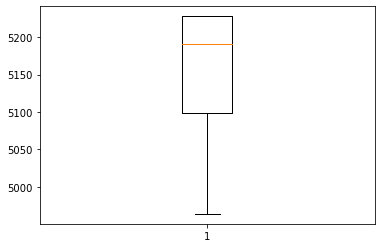

In [69]:
for j in df.select_dtypes(include=[np.float64,np.int64]).columns:
    print(j)
    plt.boxplot(df[j])
    plt.show()

C:\Users\raman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

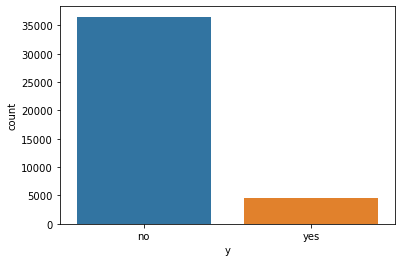

In [70]:
sns.countplot(df['y'])

In [71]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## LabelEncode 

In [72]:
le = preprocessing.LabelEncoder()

In [73]:
transform = ['marital','contact','poutcome','month','default','loan','housing','y','day_of_week']
for j in transform:
    df[j] = le.fit_transform(df[j])

In [74]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Time to get dummies

In [148]:
dfd=pd.get_dummies(df.drop(['pdays','poutcome'],axis=1),columns=['job','education'])

In [160]:
dfd.drop(['job_unemployed','education_unknown'],axis=1,inplace=True)

In [149]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   marital                        41188 non-null  int32  
 2   default                        41188 non-null  int32  
 3   housing                        41188 non-null  int32  
 4   loan                           41188 non-null  int32  
 5   contact                        41188 non-null  int32  
 6   month                          41188 non-null  int32  
 7   day_of_week                    41188 non-null  int32  
 8   duration                       41188 non-null  int64  
 9   campaign                       41188 non-null  int64  
 10  previous                       41188 non-null  int64  
 11  emp.var.rate                   41188 non-null  float64
 12  cons.price.idx                 41188 non-null 

In [150]:
dfd

,age,marital,default,housing,loan,contact,month,day_of_week,duration,campaign,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,1,0,0,0,1,6,1,261,1,...,0,0,1,0,0,0,0,0,0,0
1,57,1,1,0,0,1,6,1,149,1,...,0,0,0,0,0,1,0,0,0,0
2,37,1,0,2,0,1,6,1,226,1,...,0,0,0,0,0,1,0,0,0,0
3,40,1,0,0,0,1,6,1,151,1,...,0,0,0,1,0,0,0,0,0,0
4,56,1,0,0,2,1,6,1,307,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,2,0,0,7,0,334,1,...,0,0,0,0,0,0,0,1,0,0
41184,46,1,0,0,0,0,7,0,383,1,...,0,0,0,0,0,0,0,1,0,0
41185,56,1,0,2,0,0,7,0,189,2,...,0,0,0,0,0,0,0,0,1,0
41186,44,1,0,0,0,0,7,0,442,1,...,0,0,0,0,0,0,0,1,0,0


In [151]:
dfd.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'],
      dtype='object')

## Split x and y

In [152]:
x = dfd.drop(['y'],axis=1)
y = dfd['y']

## Scale the data

In [153]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Train_Test_Split

In [154]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=252)

In [155]:
'''dic={}
for i in range(550):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    modelLog = LogisticRegression()
    modelLog.fit(train_x,train_y)
    dic[i]=modelLog.score(test_x,test_y)'''

'dic={}\nfor i in range(550):\n    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)\n    modelLog = LogisticRegression()\n    modelLog.fit(train_x,train_y)\n    dic[i]=modelLog.score(test_x,test_y)'

In [156]:
#max(zip(dic.values(),dic.keys()))

# Q3

# Logistic Regression

In [157]:
modelLog = LogisticRegression()
modelLog.fit(train_x,train_y)

LogisticRegression()

In [158]:
log = modelLog.score(test_x,test_y)

In [159]:
log

0.9135712551590192

# AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [113]:
modelAda = AdaBoostClassifier(n_estimators=100, random_state=252)

In [114]:
modelAda.fit(train_x,train_y)


0.91442097596504

In [133]:
ada=modelAda.score(test_x,test_y)

## Naive

In [127]:
modelNaive = GaussianNB(var_smoothing=5)
modelNaive.fit(train_x, train_y)


0.8959698956057296

In [134]:
naive = modelNaive.score(test_x,test_y)

## KNN

In [129]:
modelKNN = KNeighborsClassifier(n_neighbors=9)
modelKNN.fit(train_x,train_y)


0.8931779558145181

In [135]:
knn = modelKNN.score(test_x,test_y)

## SVM

In [131]:
modelSVM = svm.SVC()
modelSVM.fit(train_x,train_y)


0.9050740470988103

In [136]:
svm = modelSVM.score(test_x,test_y)

In [144]:
svm

<module 'sklearn.svm' from 'C:\\Users\\raman\\anaconda3\\lib\\site-packages\\sklearn\\svm\\__init__.py'>

# Q4

# Tabulate

In [142]:
table = [["Model Name","Test Accuracy"],['',''],["Logistic Regression",log],["AdaBoost",ada],["Naive",naive],["KNN",knn],["SVM",svm]]

In [143]:
print(tabulate(table))

-------------------  --------------------------------------------------------------------------------------------------------
Model Name           Test Accuracy

Logistic Regression  0.9145423646516144
AdaBoost             0.91442097596504
Naive                0.8959698956057296
KNN                  0.8931779558145181
SVM                  <module 'sklearn.svm' from 'C:\\Users\\raman\\anaconda3\\lib\\site-packages\\sklearn\\svm\\__init__.py'>
-------------------  --------------------------------------------------------------------------------------------------------


## Logistic Regression is the best fit for this model

## Let's train our entire data

In [195]:
modelLog.fit(x,y)

LogisticRegression()

# Part II Time Series

## Importing Libraries..

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

## Load DataSet

In [164]:
df=pd.read_csv("MonthWiseMarketArrivals_Clean.csv")

## Check dataset

In [165]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [166]:
df.shape

(10227, 10)

In [167]:
df.date=pd.DatetimeIndex(df.date)

## Get Mumbai Data

In [168]:
dfMumbai = df[df['city']=='MUMBAI']

## sort by month

In [169]:
dfMumbai = df[df.city == 'MUMBAI']
dfMumbai = dfMumbai.sort_values(by = "month")
dfMumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6702,MUMBAI,April,2014,238351,638,1238,939,MS,MUMBAI,2014-04-01
6703,MUMBAI,April,2015,243100,1209,1445,1327,MS,MUMBAI,2015-04-01
6692,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
6693,MUMBAI,April,2005,286150,238,419,328,MS,MUMBAI,2005-04-01
6694,MUMBAI,April,2006,253765,240,343,290,MS,MUMBAI,2006-04-01


### set precision

In [170]:
pd.set_option('precision', 0)

In [171]:
dfMumbai.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146,146,146,146,146
mean,2010,221721,901,1317,1114
std,4,40793,731,1019,883
min,2004,131590,215,335,287
25%,2007,195125,434,648,544
50%,2010,222220,692,982,846
75%,2013,246050,1099,1623,1392
max,2016,413681,4005,5517,4714


In [172]:
dfMumbai.index = pd.PeriodIndex(dfMumbai.month, freq='M')

## Plot

<AxesSubplot:xlabel='month'>

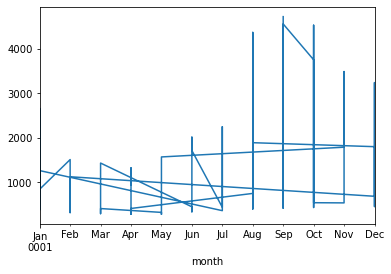

In [173]:
dfMumbai.priceMod.plot()

In [174]:
dfMumbai["diff"]=dfMumbai.priceMax-dfMumbai.priceMin
dfMumbai['monthVal'] = pd.DatetimeIndex(dfMumbai['date']).month

In [175]:
dfMumbaiPivot = pd.pivot_table(dfMumbai, values = "diff", columns = "year", index = "monthVal")

<AxesSubplot:xlabel='monthVal'>

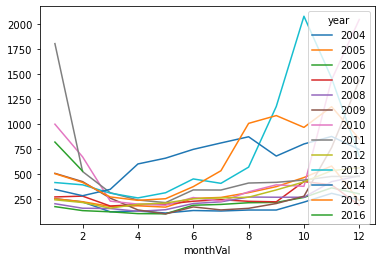

In [176]:
dfMumbaiPivot.plot()

<AxesSubplot:ylabel='Frequency'>

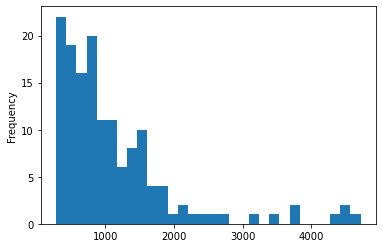

In [177]:
dfMumbai.priceMod.plot(kind = "hist", bins = 30)

In [178]:
dfMumbai['priceModLog'] = np.log(dfMumbai.priceMod)
dfMumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,diff,monthVal,priceModLog
month,,,,,,,,,,,,,
0001-04,MUMBAI,April,2014,238351,638,1238,939,MS,MUMBAI,2014-04-01,600,4,7
0001-04,MUMBAI,April,2015,243100,1209,1445,1327,MS,MUMBAI,2015-04-01,236,4,7
0001-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01,129,4,6
0001-04,MUMBAI,April,2005,286150,238,419,328,MS,MUMBAI,2005-04-01,181,4,6
0001-04,MUMBAI,April,2006,253765,240,343,290,MS,MUMBAI,2006-04-01,103,4,6


<AxesSubplot:ylabel='Frequency'>

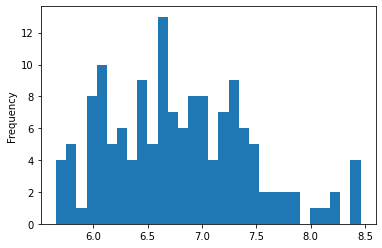

In [179]:
dfMumbai.priceModLog.plot(kind = "hist", bins = 30)

In [180]:
model_mean_pred = dfMumbai.priceModLog.mean()
dfMumbai["priceMean"] = np.exp(model_mean_pred)

<AxesSubplot:xlabel='date'>

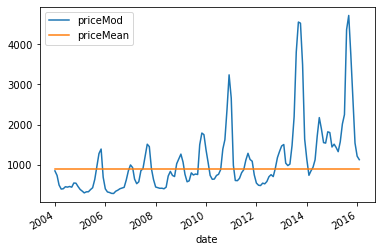

In [181]:
dfMumbai.plot(kind="line", x="date", y = ["priceMod", "priceMean"])

## RMSE

In [182]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [183]:
model_mean_RMSE = RMSE(dfMumbai.priceMean, dfMumbai.priceMod)
model_mean_RMSE

908.4772843986443

In [184]:
dfMumbaiResults = pd.DataFrame(columns = ["Model", "Forecast", "RMSE"])
dfMumbaiResults.loc[0,"Model"] = "Mean"
dfMumbaiResults.loc[0,"Forecast"] = np.exp(model_mean_pred)
dfMumbaiResults.loc[0,"RMSE"] = model_mean_RMSE
dfMumbaiResults.head()

,Model,Forecast,RMSE
0,Mean,889,908


In [185]:
dfMumbai["timeIndex"] = dfMumbai.date - dfMumbai.date.min()
dfMumbai["timeIndex"] =  dfMumbai["timeIndex"]/np.timedelta64(1, 'M')
dfMumbai["timeIndex"] = dfMumbai["timeIndex"].round(0).astype(int)

In [186]:
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfMumbai).fit()

In [187]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Sat, 21 May 2022   Prob (F-statistic):           8.89e-22
Time:                        22:17:49   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeIndex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.551
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
model_linear_pred = model_linear.predict()

In [189]:
model_linear_pred

array([7.32084247, 7.44693336, 6.05993359, 6.18602448, 6.31211537,
       6.43820626, 7.19475158, 6.69038803, 6.81647892, 6.94256981,
       7.06866069, 6.56429714, 7.11069099, 6.9846001 , 6.85850921,
       6.73241833, 6.60632744, 6.22805478, 6.35414566, 6.10196389,
       7.23678188, 7.48896365, 6.48023655, 7.36287277, 7.40490306,
       7.53099395, 6.14399418, 7.27881217, 7.15272129, 7.0266304 ,
       6.90053951, 6.77444862, 6.64835774, 6.52226685, 6.39617596,
       6.27008507, 7.5520091 , 7.29982732, 6.16500933, 6.29110022,
       6.41719111, 6.543282  , 6.66937288, 6.79546377, 6.92155466,
       7.04764555, 7.17373643, 6.03891844, 7.42591821, 6.02841087,
       7.41541064, 7.28931975, 7.16322886, 7.03713797, 6.91104708,
       6.7849562 , 7.54150152, 6.53277442, 6.40668353, 6.28059265,
       6.15450176, 6.65886531, 6.34363809, 6.46972898, 6.59581987,
       6.72191075, 6.84800164, 7.10018342, 7.2262743 , 7.35236519,
       7.47845608, 6.2175472 , 6.97409253, 6.09145631, 7.34185

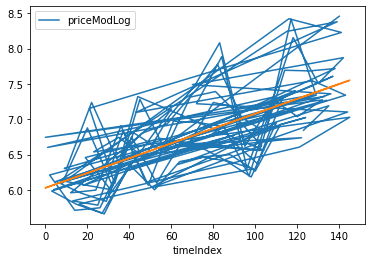

In [190]:
dfMumbai.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfMumbai.timeIndex,model_linear_pred, '-')

In [191]:
dfMumbai["priceLinear"] = np.exp(model_linear_pred)

In [192]:
model_linear_RMSE = RMSE(dfMumbai.priceLinear, dfMumbai.priceMod)
model_linear_RMSE

724.7073314178774

<AxesSubplot:xlabel='timeIndex'>

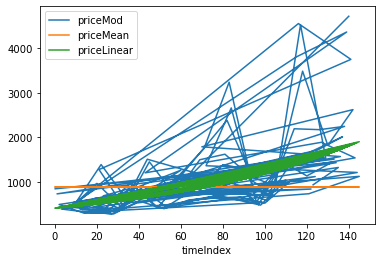

In [193]:
dfMumbai.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear"])